In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'])
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [3]:
df = df[(df['value']>=df['value'].quantile(0.025)) & (df['value']<=df['value'].quantile(0.975))]
df.shape

(1238, 2)

Text(0, 0.5, 'Page Views')

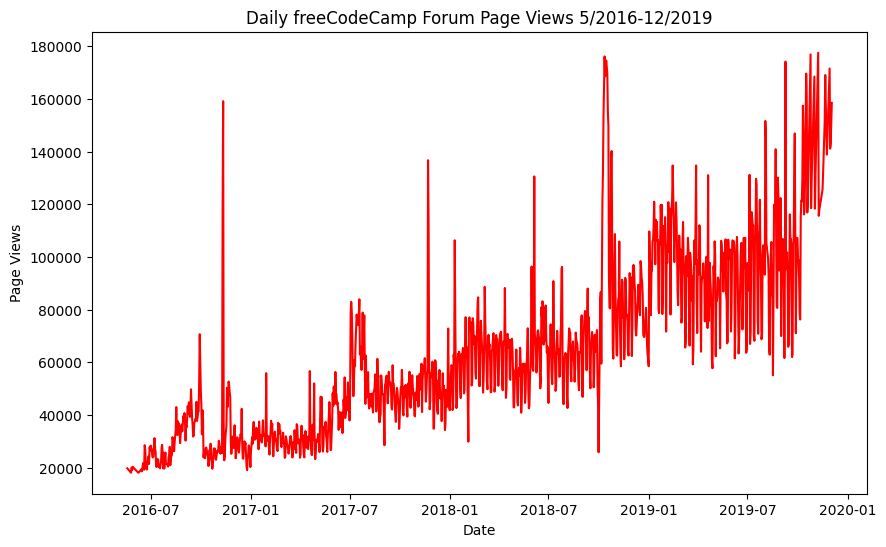

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
date = df["date"]
value = df["value"]
plt.plot(date, value, 'r')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

In [5]:
df_bar = df.copy()
df_bar['Years'] = df_bar['date'].dt.year
df_bar['Months'] = df_bar['date'].dt.month_name()
df_bar = df_bar.groupby(['Years', 'Months'])['value'].agg('mean').reset_index()
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

Text(0, 0.5, 'Average Page Views')

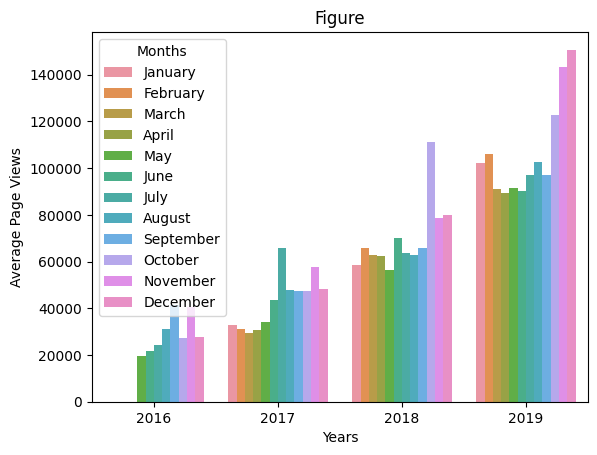

In [6]:
fig, ax = plt.subplots()
sns.barplot(data=df_bar,x='Years', y='value' ,hue='Months', hue_order=months)
plt.title("Figure")
plt.xlabel("Years")
plt.ylabel("Average Page Views")

In [7]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

Text(0, 0.5, 'Page Views')

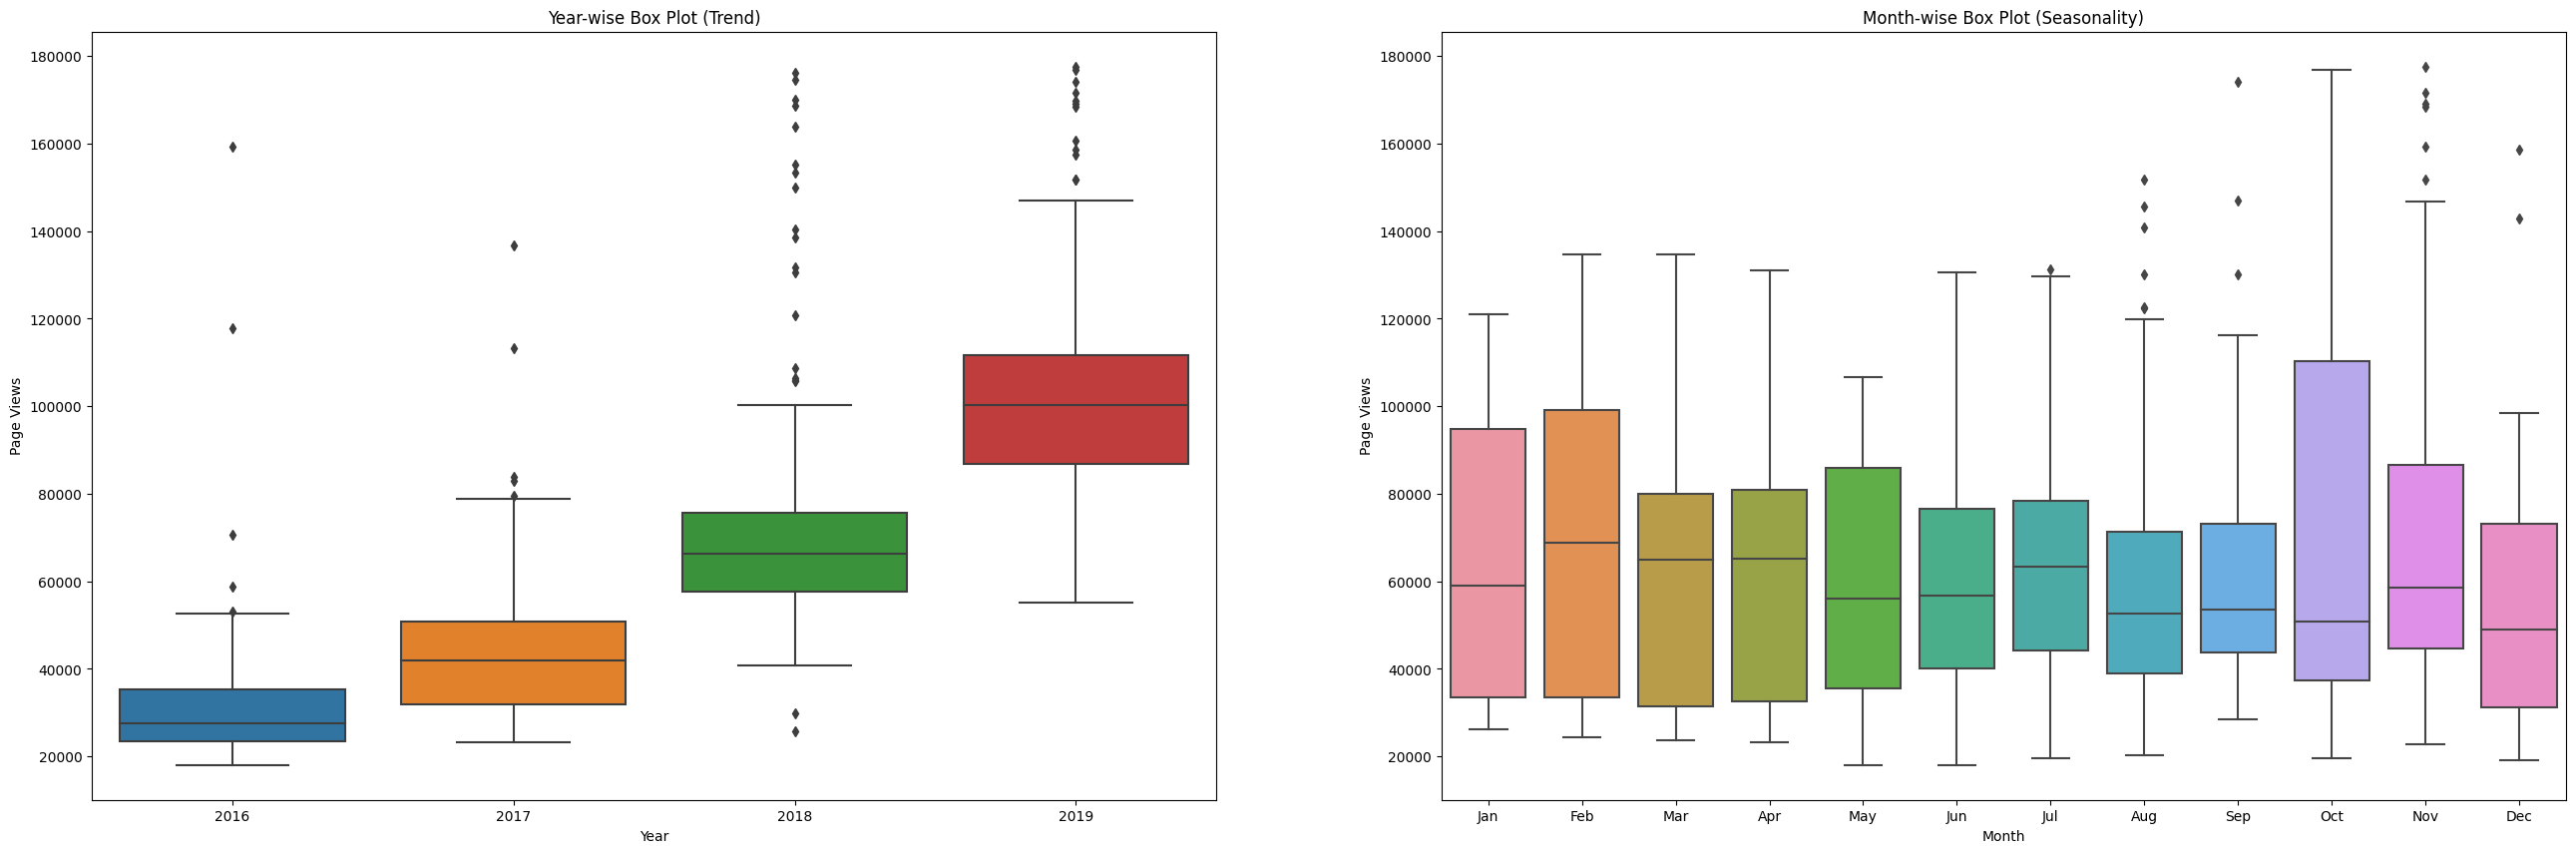

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(32, 10))
sns.boxplot(data=df_box, x="year", y="value", ax=axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=axes[1])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")